Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.
You need to predict the happiness score considering all the other factors mentioned in the dataset.
Dataset Link-
https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv



https://github.com/dsrscientist/DSData


# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from sklearn.naive_bayes import MultinomialNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC 

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')


# Importing dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


We observe that in this data set numerical as well as categorical data is present

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.sample(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
80,Pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
48,Bahrain,Middle East and Northern Africa,49,5.960,0.05412,1.32376,1.21624,0.74716,0.45492,0.30600,0.17362,1.73797
31,Uruguay,Latin America and Caribbean,32,6.485,0.04539,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142
70,Mauritius,Sub-Saharan Africa,71,5.477,0.07197,1.00761,0.98521,0.70950,0.56066,0.07521,0.37744,1.76145
137,Mali,Sub-Saharan Africa,138,3.995,0.05602,0.26074,1.03526,0.20583,0.38857,0.12352,0.18798,1.79293
94,Albania,Central and Eastern Europe,95,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
32,Colombia,Latin America and Caribbean,33,6.477,0.05051,0.91861,1.24018,0.69077,0.53466,0.05120,0.18401,2.85737
51,Moldova,Central and Eastern Europe,52,5.889,0.03799,0.59448,1.01528,0.61826,0.32818,0.01615,0.20951,3.10712
109,Iran,Middle East and Northern Africa,110,4.686,0.04449,1.00880,0.54447,0.69805,0.30033,0.05863,0.38086,1.69440


In [6]:
#checking the null value of  column of dataset
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

we observe that there is no null value is present in any column

In [7]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 0


<Axes: >

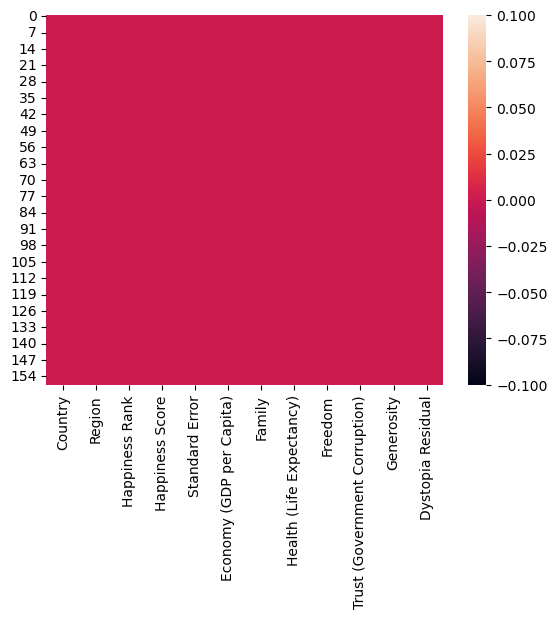

In [8]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe by heat map that there is no null value is present in any column

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

out of 158 row we observe that there is no null value is present in any column,and all datatypes seem to be right

In [10]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Exploratory Data Analysis(EDA)

In [11]:
#checking the shape of dataset
df.shape

(158, 12)

we observe that there 158 row and 12 columns is present in this dataset

In [12]:
#checking the column of dataset
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

there are 12 no of column is present out of which Dystopia Residualis our target 

In [13]:
# to convert index from row to columnWorld Happiness Report Project
df.columns.tolist()


['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [14]:
#checking the types of column of dataset
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

We observe there are both type object and float datatype are present

In [15]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


mostly all column have unique value in all row except region ehere only 10 unique value present

In [16]:
#checking the null value of all column of dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

These are the value counts of all columns and we have seen there is no white space are present

In [17]:
#checking the list of counts of target
df["Happiness Score"].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

appox all are unique value

In [18]:
df["Happiness Score"].value_counts()

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64

there are 158 unique value are present

In [19]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: ['Country', 'Region']


Numerical columns: ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


There are two categorical column and other are numerical column

# Description of data set

In [20]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


This gives the all statical information of the numerical columns.There is no negative or invalid value is present
hence we can say that it is perfect we can obserbe these points: 
    1.The counts of all columns are same it means there is no missing value in any column
    2.The mean value is greater than median(50%) in all columns are apoximately equal it meand this data set
    is normaly distributed columns which means the data is not skewed  in these columns 
    3.There no any columns in which mean value is less than median(50%) hence there no right skewed 
    4.There is major difference beteen 75% and max in Happiness Rank  it means the 
    outliers are present in this columns
    5.In this discription min,std and 25% detail also found

In [22]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
df['Country']


0      135
1       58
2       37
3      105
4       24
      ... 
153    118
154     13
155    136
156     21
157    141
Name: Country, Length: 158, dtype: int32

In [23]:
df['Region']=le.fit_transform(df['Region'])
df['Region']

0      9
1      9
2      9
3      9
4      5
      ..
153    8
154    8
155    4
156    8
157    8
Name: Region, Length: 158, dtype: int32

In [24]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


univariate analysis

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


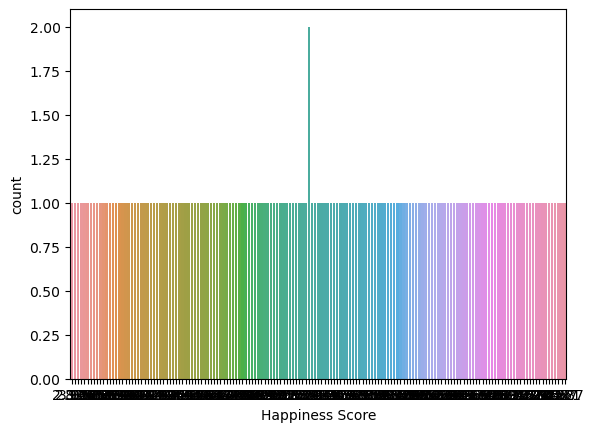

In [25]:
#visualizing the no of Dystopia Residual
ax=sns.countplot(x='Happiness Score',data=df)
print(df['Happiness Score'].value_counts())

#Check correlation

In [27]:
correlations = df.corr()['Happiness Score'].sort_values(ascending=False)
print(correlations)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Country                          0.083380
Region                          -0.176791
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64


<Axes: >

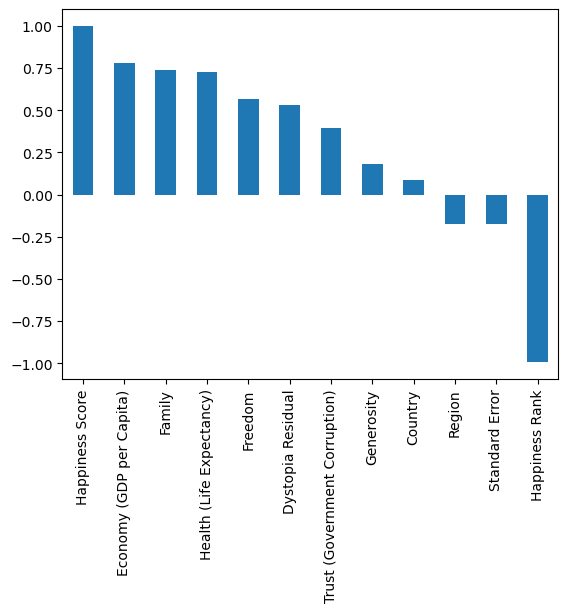

In [28]:
correlations.plot(kind='bar')

From this barplot we can observe, some obvious feature correlations such as residual sugar,free sulfur dioxide and pH are less correlated this barplot show value between +0.75 to  -1

<Axes: >

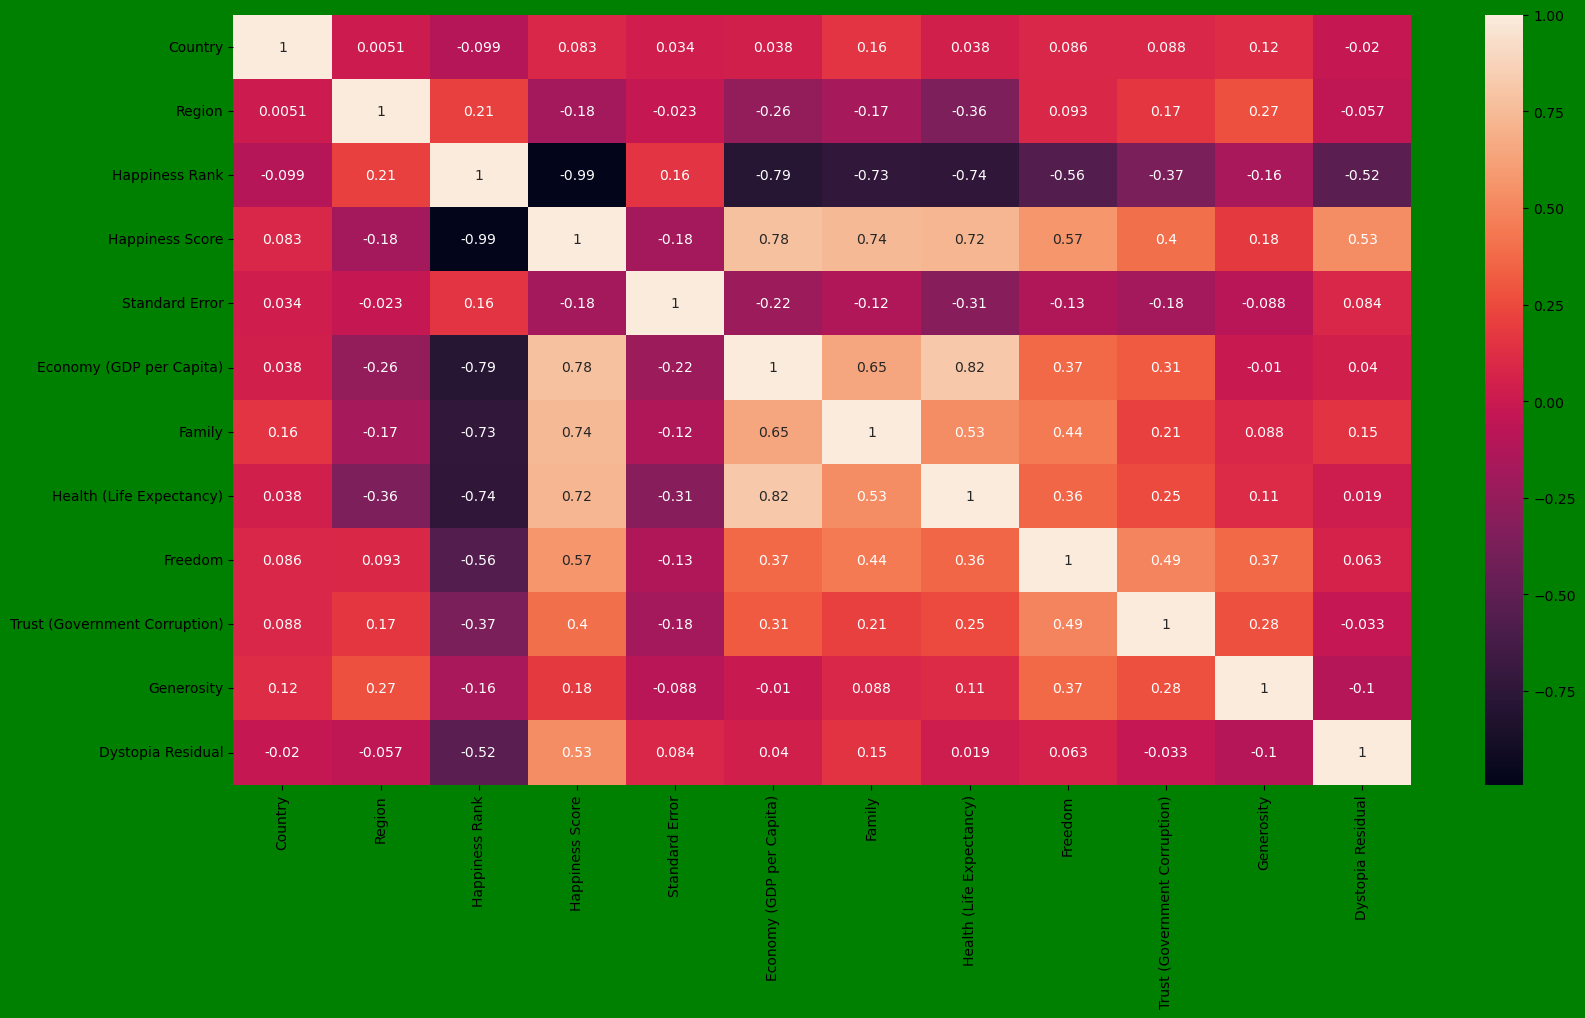

In [29]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='green')
sns.heatmap(df.corr(),annot=True)

From this heatmap we can observe, some obvious feature correlations such as economy,family,Health and freedom is more correlated with happiness score,We can also observe that approximately half of these features correlate positively with 
happiness score and the other some are like happiness rank and other are negatively correlated,all these features, we are going to select the ones with bigger numbers since these are the ones that will give us more information. To do so we are going to stablish a minimum threshold of correlation approximately around 0.2 (absolut value) since we do not have to take into account features whose values might be redundant
and not provide information at all.

In [30]:
print(abs(correlations) > 0.2)

Happiness Score                   True
Economy (GDP per Capita)          True
Family                            True
Health (Life Expectancy)          True
Freedom                           True
Dystopia Residual                 True
Trust (Government Corruption)     True
Generosity                       False
Country                          False
Region                           False
Standard Error                   False
Happiness Rank                    True
Name: Happiness Score, dtype: bool


From all the values, we are selecting Economy (GDP per Capita), Family, Health (Life Expectancy),Freedom,and 
trust (Government Corruption)in order to study them better and see the distribution of values that separate
the different qualities these are positively effect happiness score

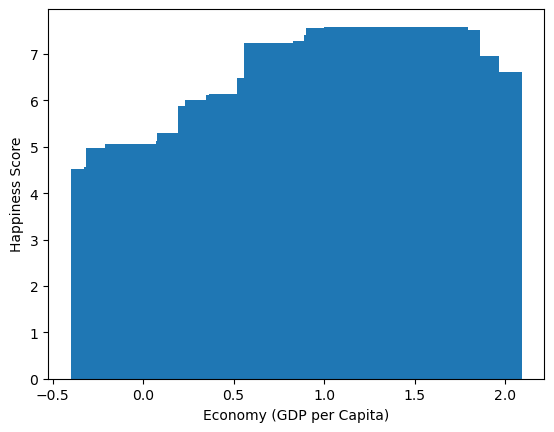

In [31]:
plt.bar(df['Economy (GDP per Capita)'], df['Happiness Score'])
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

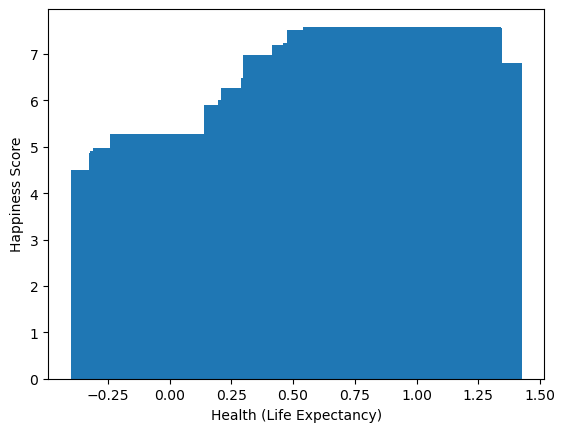

In [32]:
plt.bar(df['Health (Life Expectancy)'], df['Happiness Score'])
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.show()

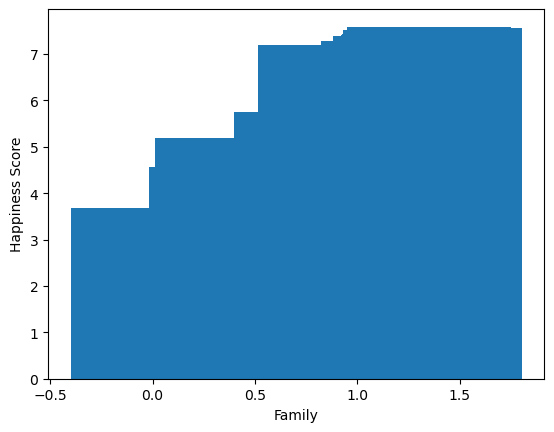

In [31]:
plt.bar(df['Family'], df['Happiness Score'])
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.show()

we observe from all graph data is skewed toward right side

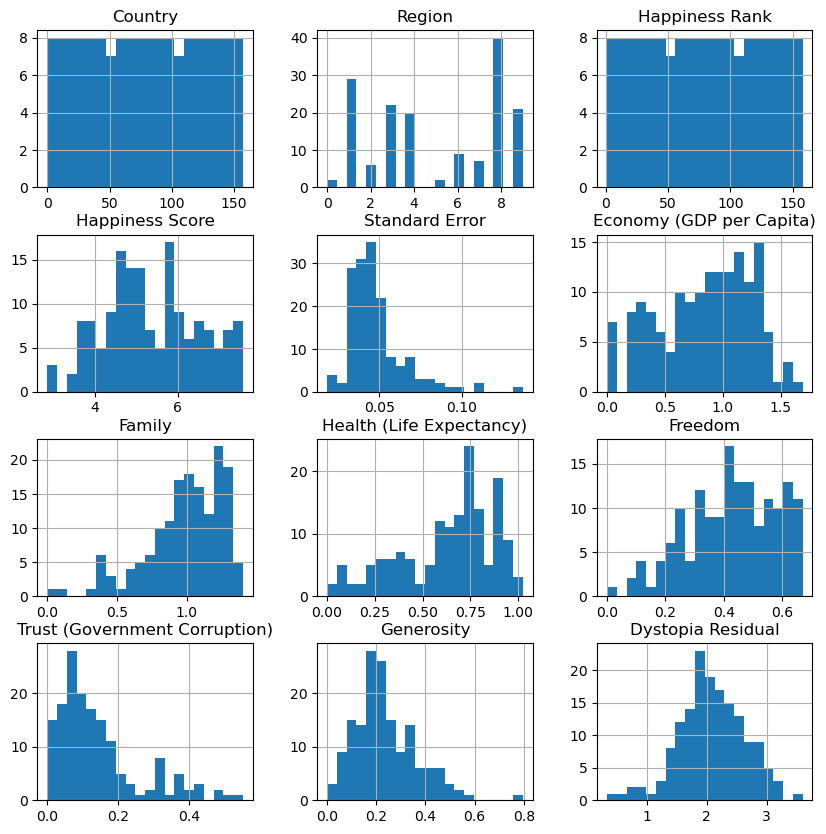

In [33]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

In [ ]:
we observe that all features are normaly distributed

In [34]:
#checking skewness
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

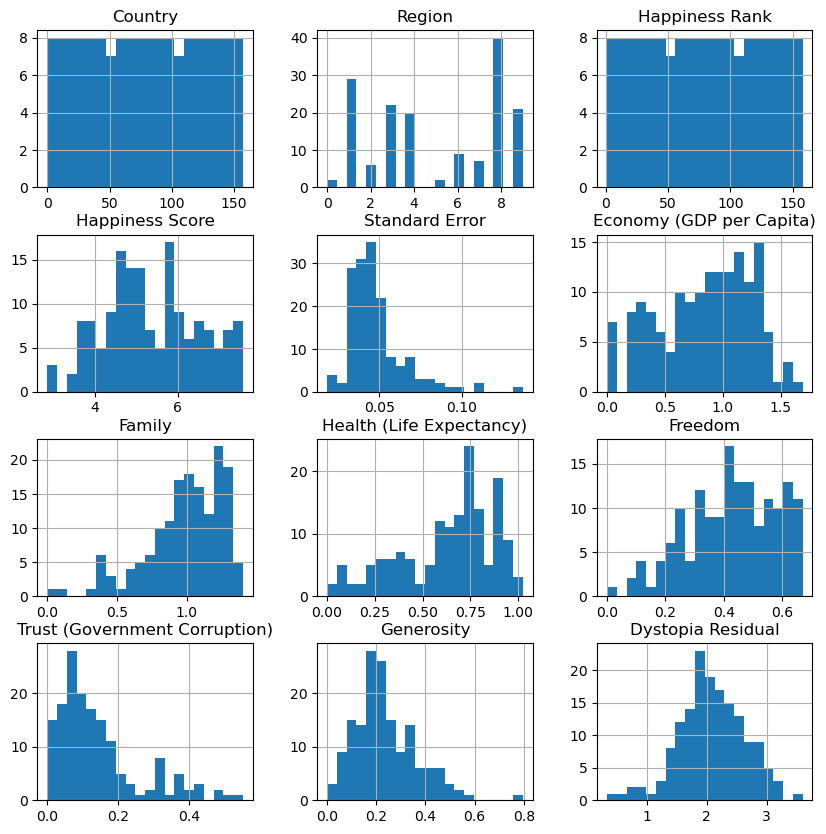

In [35]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

we observe now all features are normaly distributed

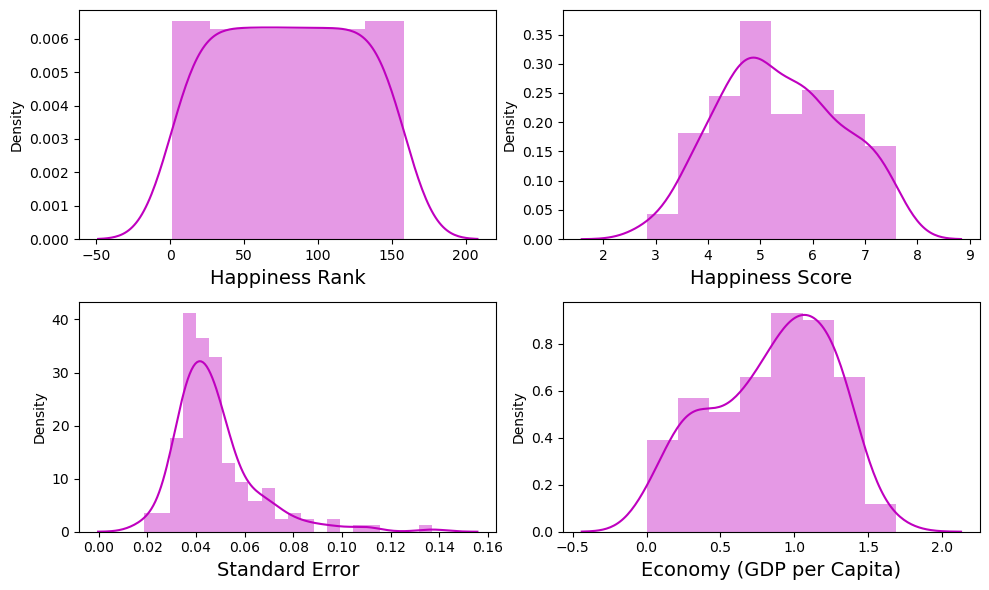

In [36]:
#checking how data is distributed
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color= "m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

we observe now all features are normaly distributed

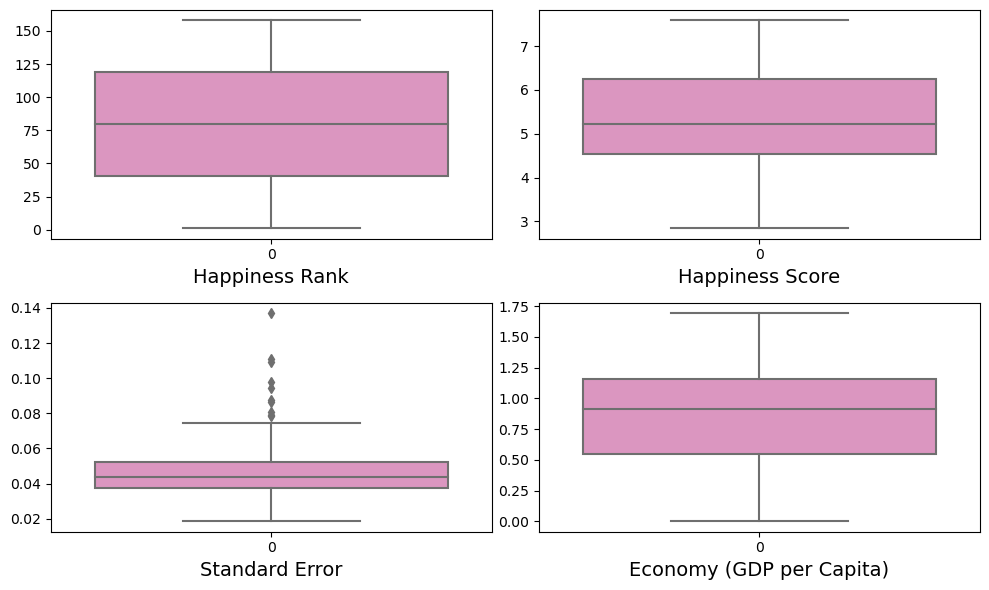

In [37]:
#checking for outliers
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

# Effect of Economy (GDP per Capita) on happiness score

[Text(0.5, 1.0, 'Economy (GDP per Capita) effect on happiness score')]

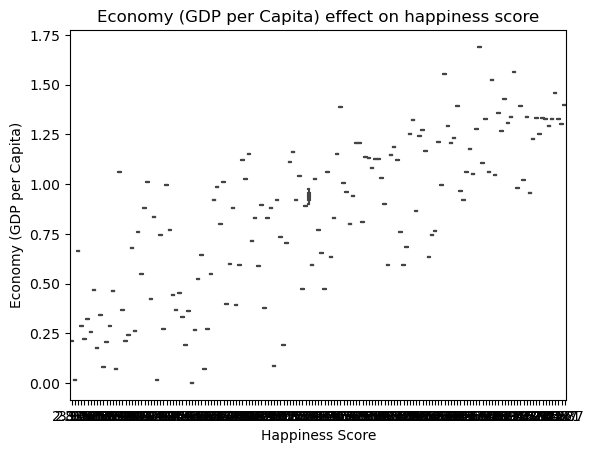

In [38]:
bp = sns.boxplot(x='Happiness Score',y='Economy (GDP per Capita)', data=df)
bp.set(title="Economy (GDP per Capita) effect on happiness score")

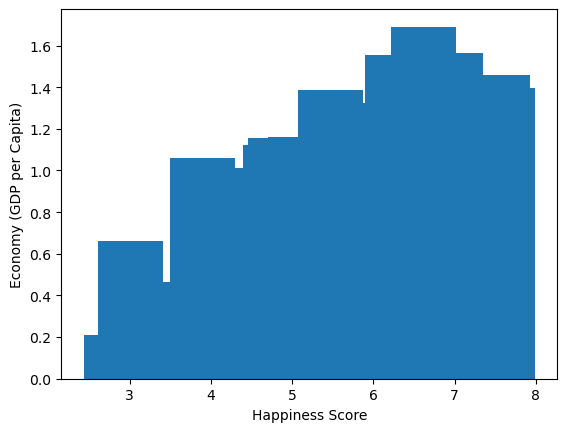

In [39]:
plt.bar(df['Happiness Score'], df['Economy (GDP per Capita)'])
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
plt.show()

we observe that the country which have more Economy (GDP per Capita)there happiness score is high

# Effect of Family on happiness score

[Text(0.5, 1.0, 'Family effect on happiness score')]

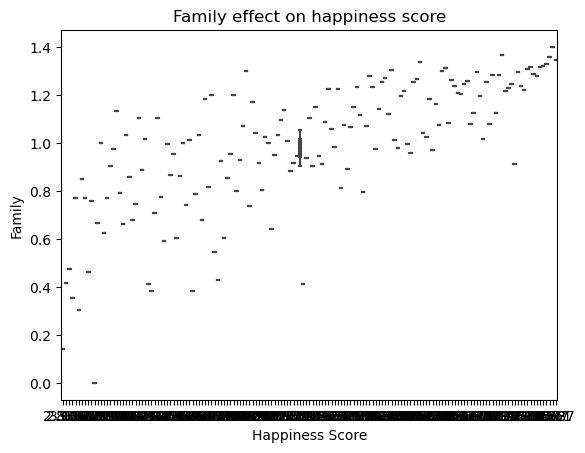

In [40]:
bp = sns.boxplot(x='Happiness Score',y='Family', data=df)
bp.set(title="Family effect on happiness score")

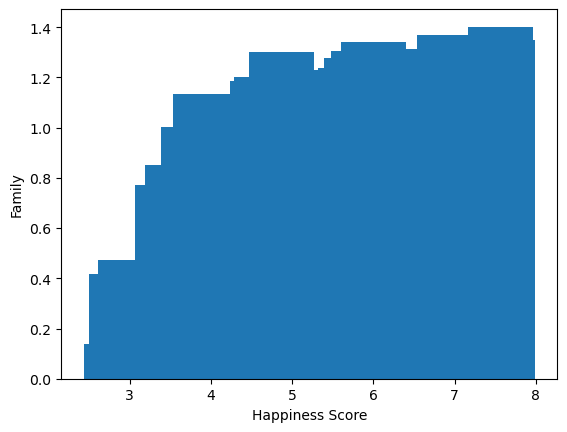

In [39]:
plt.bar(df['Happiness Score'], df['Family'])
plt.xlabel('Happiness Score')
plt.ylabel('Family')
plt.show()

we observe that the country where people live with family there happiness score is high

# Effect of Freedom on happiness score

[Text(0.5, 1.0, 'Freedom effect on happiness score')]

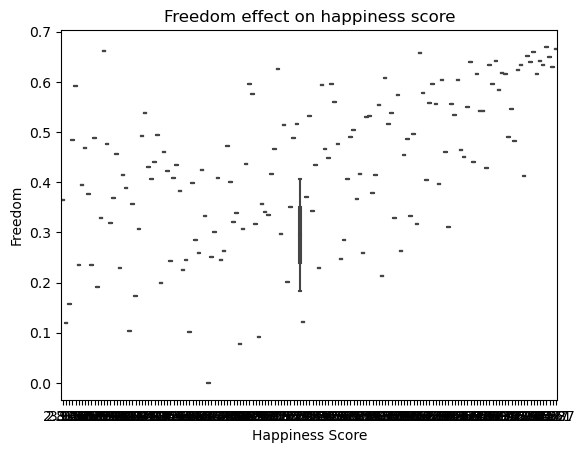

In [41]:
bp = sns.boxplot(x='Happiness Score',y='Freedom', data=df)
bp.set(title="Freedom effect on happiness score")

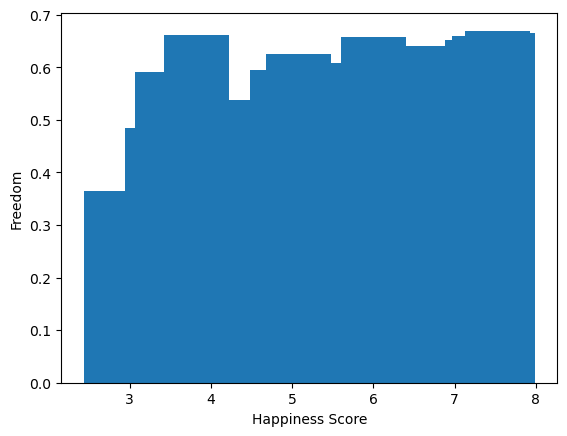

In [43]:
plt.bar(df['Happiness Score'], df['Freedom'])
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')
plt.show()

we observe that the country where people live freeedom given by government thre people are more happy and happiness 
score is high

# visualising correlation with target to other value

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [42]:
correlations = df.corr()['Happiness Score'].sort_values(ascending=False)
print(correlations)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Country                          0.083380
Region                          -0.176791
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64


In [43]:
cor=df.corr()
cor

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


this shows corellation between target and other values

In [45]:
df.groupby('Happiness Score').mean()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,,,,,,,,,,,
2.839,141.0,8.0,158.0,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
2.905,21.0,8.0,157.0,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
3.006,136.0,4.0,156.0,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
3.340,13.0,8.0,155.0,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
3.465,118.0,8.0,154.0,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
...,...,...,...,...,...,...,...,...,...,...,...
7.427,24.0,5.0,5.0,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
7.522,105.0,9.0,4.0,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
7.527,37.0,9.0,3.0,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [46]:
df.groupby('Economy (GDP per Capita)').mean()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Economy (GDP per Capita),,,,,,,,,,,
0.00000,32.0,8.0,120.0,4.517,0.03680,1.00120,0.09806,0.22605,0.07625,0.24834,2.86712
0.01530,21.0,8.0,157.0,2.905,0.08658,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
0.01604,85.0,8.0,131.0,4.292,0.06130,0.41134,0.22562,0.43054,0.06977,0.33128,2.80791
0.06940,102.0,8.0,144.0,3.845,0.03602,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877
0.07120,79.0,8.0,116.0,4.571,0.11068,0.78968,0.34201,0.28531,0.06232,0.24362,2.77729
...,...,...,...,...,...,...,...,...,...,...,...
1.45900,105.0,9.0,4.0,7.522,0.03880,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
1.52186,123.0,6.0,24.0,6.798,0.03780,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
1.55422,73.0,4.0,39.0,6.295,0.04456,1.16594,0.72492,0.55499,0.25609,0.16228,1.87634


we observe that more economy happiness score is high

Text(0.5, 1.0, 'Correlations Among Features')

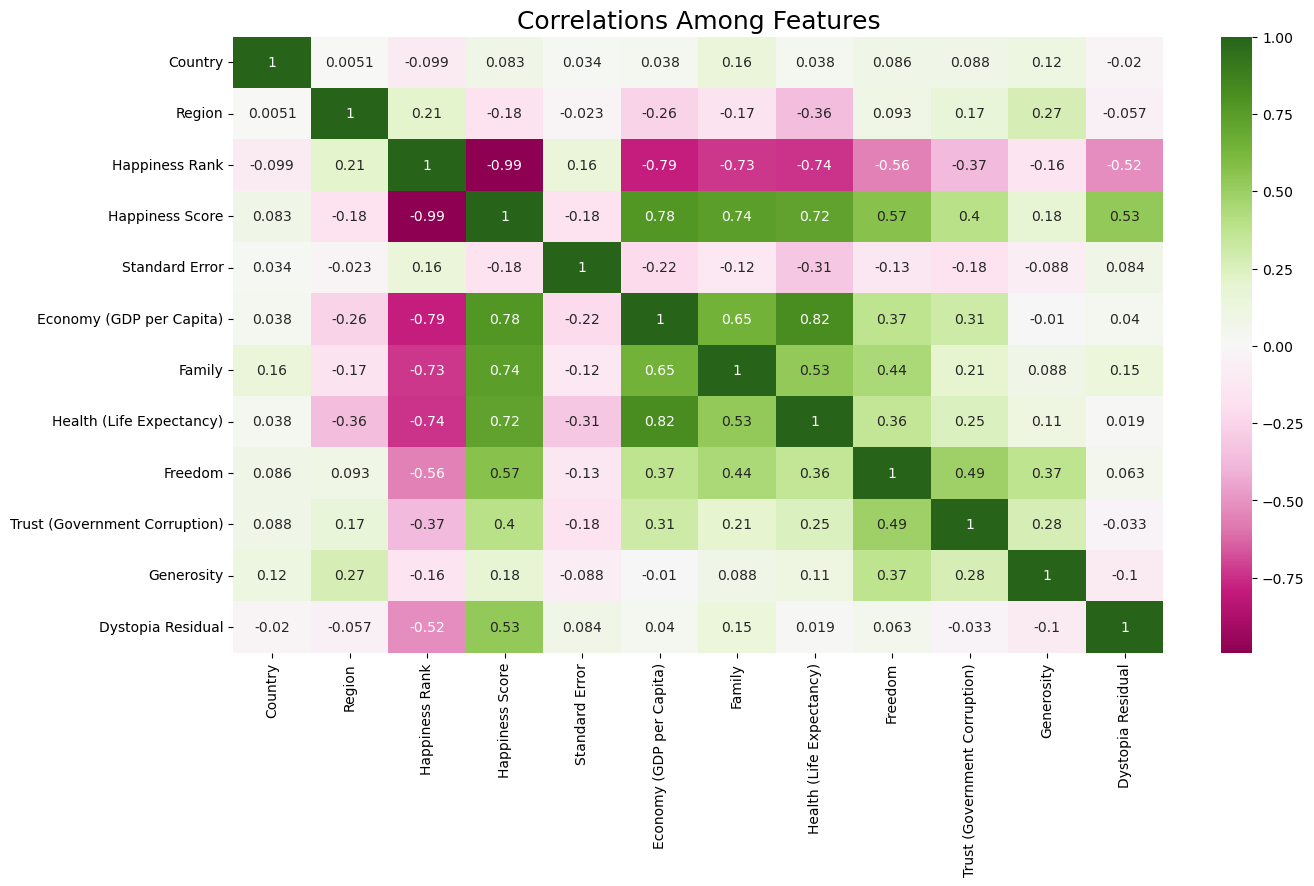

In [47]:
plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 18)

Positive Correlation Features:

Economy (GDP per Capita),Family Health (Life Expectancy),Freedom and Happiness Score is 0.78,0.74,72 and 0.54 there is a
positive correlation between Economy (GDP per Capita),Family Health (Life Expectancy),Freedom and Happiness Score rated. 
This can be explained by saying that, the country where  more Economy (GDP per Capita),Family Health (Life Expectancy),Freedom
they are more happy.

Negative Correlation Features:

Economy (GDP per Capita) and Happiness Rank: -0.79 is very low

In [49]:
# Data Cleaning

# Dropping Country,Region,Happiness Rank  and Standard Error since we do not require
df =df.drop(['Country', 'Region', 'Happiness Rank','Standard Error'],axis=1)      

df.shape

(158, 8)

In [50]:
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [51]:
df.isnull().sum()

Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# Separating feature and target

In [52]:
x=df.drop("Happiness Score", axis= 1)
y=df["Happiness Score"]

In [53]:
x.shape

(158, 7)

In [54]:
y.shape

(158,)

# Feature Scaling using Standard Scalarization

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...
153,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


we scale the data to overcome biasness

# checking variance inflation Factor(vif)

In [56]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x.values, i)
                    for i in range (len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,4.088959,Economy (GDP per Capita)
1,1.944328,Family
2,3.157781,Health (Life Expectancy)
3,1.749104,Freedom
4,1.421872,Trust (Government Corruption)
5,1.289134,Generosity
6,1.049255,Dystopia Residual


we observe by checking vif values the feature not causing multicollineraity problem. in no any one have vif is not
more than 10 so no need to drop any feature.
and there no multicollineraity problem .

In [57]:
y.value_counts()

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64

# oversampling

# Model Creation

Finding the best random state

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# creating train test split

In [66]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS  = i
print("Maximum r2 score is =",  maxAccu, "on random_state ", maxRS)

Maximum r2 score is = 0.9999999642713742 on random_state  148


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRS)

# classification algorithms

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge


In [77]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR= RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_RFR)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_RFR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score: 0.8482639312882374
R2_score on training Data: 98.71813355822304
Mean_Absolute_Error: 0.4159562500000004
Mean_Squared_Error: 0.27349860430833356
Root Mean Squared Error: 0.5229709402140176


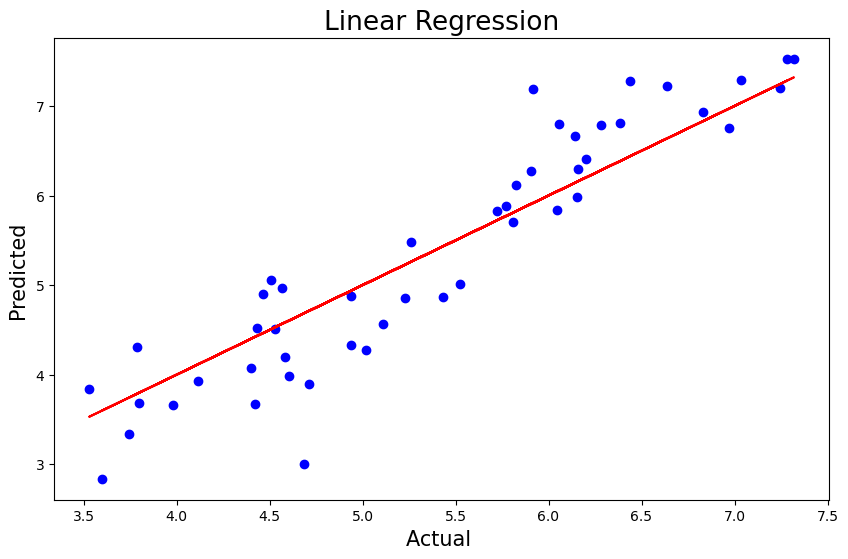

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_RFR,y=y_test,color='b')
plt.plot(pred_RFR,pred_RFR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Linear Regression",fontsize=19)
plt.show()

In [79]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_knn)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_knn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score: 0.8943326040237949
R2_score on training Data: 92.32190114571883
Mean_Absolute_Error: 0.33551666666666663
Mean_Squared_Error: 0.19046153999999996
Root Mean Squared Error: 0.43641899592020506


In [80]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR= GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_GBR)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_GBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score: 0.9083587601733629
R2_score on training Data: 99.95213124398458
Mean_Absolute_Error: 0.3115449751282288
Mean_Squared_Error: 0.16517991669654736
Root Mean Squared Error: 0.40642332203817655


In [81]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso= lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_lasso)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_lasso))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_score: -0.0005616206521210643
R2_score on training Data: 0.0
Mean_Absolute_Error: 1.1953916666666664
Mean_Squared_Error: 1.8034750016666665
Root Mean Squared Error: 1.3429352187155814


In [82]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd= rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_rd)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_rd))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_rd)))

R2_score: 0.9999602668160832
R2_score on training Data: 99.99564395956683
Mean_Absolute_Error: 0.007120290294342718
Mean_Squared_Error: 7.161758201744245e-05
Root Mean Squared Error: 0.008462717176973507


In [85]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR= dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_DTR)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_DTR)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_DTR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_DTR)))

R2_score: 0.786914407140086
R2_score on training Data: 100.0
Mean_Absolute_Error: 0.47425000000000006
Mean_Squared_Error: 0.3840788333333334
Root Mean Squared Error: 0.6197409405012173


In [86]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_SVR= svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_SVR)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_SVR)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_SVR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_SVR)))

R2_score: 0.9000200367717158
R2_score on training Data: 98.76253265104324
Mean_Absolute_Error: 0.25917258775046037
Mean_Squared_Error: 0.18021015460521483
Root Mean Squared Error: 0.4245116660413643


# Cross Validation Score

In [88]:
from sklearn.model_selection import cross_val_score

In [90]:
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_RFR) - score.mean())*100)

[-7.29188742 -1.32155468 -0.41520712 -1.22695162 -5.57110458]
-3.1653410856394024
Difference between R2 score and cross validation score is : 401.360501692764


In [91]:
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_knn) - score.mean())*100)

[-9.41484943 -2.10610433 -2.22206621 -5.5560759  -4.96628054]
-4.8530752813288025
Difference between R2 score and cross validation score is : 574.7407885352598


In [92]:
score = cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_GBR) - score.mean())*100)

[-4.3099306  -0.84201585 -1.02158935 -2.2913159  -3.46670578]
-2.38631149385972
Difference between R2 score and cross validation score is : 329.46702540330824


In [93]:
score = cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_lasso) - score.mean())*100)

[-39.5383371  -12.7569766   -0.20386211 -30.73906532 -23.65659767]
-21.378967758942114
Difference between R2 score and cross validation score is : 2137.8406138289993


In [94]:
score = cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_rd) - score.mean())*100)

[0.99586761 0.99964715 0.99955372 0.99933854 0.99822241]
0.99852588785422
Difference between R2 score and cross validation score is : 0.14343789618631586


In [97]:
score = cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_DTR) - score.mean())*100)

[ -6.24845964  -7.80527406  -5.7801026  -10.51346285  -5.22757392]
-7.114974612329002
Difference between R2 score and cross validation score is : 790.1889019469088


In [98]:
score = cross_val_score(svr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_SVR) - score.mean())*100)

[-10.95145784   0.23336286   0.84441097   0.21503544  -6.60745096]
-3.2532199076687744
Difference between R2 score and cross validation score is : 415.32399444404905


Ridge is our best model as the difference between R2 score and cross validation
score is - 0.14343789618631586 and this is least out of all

finaly we observe that Ridge is our best model

# Hyper Parameter Tuning

In [106]:
# Linear Regression
from sklearn.model_selection import GridSearchCV



In [107]:
parameters={'alpha':[1.0,.05,.4,2],'fit_intercept':[True,False],
            'solver':['auto','svd','cholesky','isqr', 'sag', 'saga', 'lbfgs'],
            'positive':[False,False],                   
            'random_state':[1,4,10,20]
            }

In [110]:
GCV=GridSearchCV(Ridge(),parameters, cv =5)

In [111]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, False],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'isqr', 'sag',
                                    'saga', 'lbfgs']})

In [112]:
GCV.best_params_

{'alpha': 0.05,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'auto'}

In [114]:
Final_model = Ridge(alpha= 0.05,fit_intercept= True,positive = False,random_state= 1,solver= 'auto)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('R2_score:',r2_score(y_test,pred)) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.9999998597478751
Mean_Absolute_Error: 0.0004149759168033673
Mean_Squared_Error: 2.527992239779949e-07
Root Mean Squared Error: 0.0005027914318860206


# Saving the model

In [118]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"World_Happiness_Report_Prediction_Project_Analysis.pkl")

['World_Happiness_Report_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [119]:
# first we load the saved model and get prediction
model = joblib.load("World_Happiness_Report_Prediction_Project_Analysis.pkl")

#prediction
prediction = model.predict(x_test)
prediction

array([4.19460085, 4.517865  , 6.80963054, 5.01304759, 4.5070796 ,
       4.27139866, 7.52649227, 6.78571193, 6.79750303, 4.8973088 ,
       4.07704849, 6.74986179, 3.89701661, 3.66748047, 7.22508669,
       5.8324525 , 5.98725763, 4.85778957, 5.87825954, 4.56461   ,
       7.28557736, 6.93697005, 5.70879415, 6.6691789 , 6.29779178,
       2.83955025, 3.68137826, 5.05740407, 3.34056199, 3.67768919,
       3.98911034, 5.82833417, 3.93147398, 4.86686132, 7.19926888,
       4.30725521, 7.18644192, 3.00725815, 7.27690066, 4.87619635,
       6.26879119, 5.47703291, 4.97089088, 7.52156613, 3.84553286,
       6.4106877 , 6.12244508, 4.332229  ])

# these are the prediction for quality of wine

In [120]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,4.194601,4.194
1,4.517865,4.518
2,6.809631,6.810
3,5.013048,5.013
4,4.507080,4.507
5,4.271399,4.271
6,7.526492,7.527
7,6.785712,6.786
8,6.797503,6.798
9,4.897309,4.898
